In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import axes3d

# JNB Lab Solutions


## Patterns in Nature

Solution to Exercise 1a

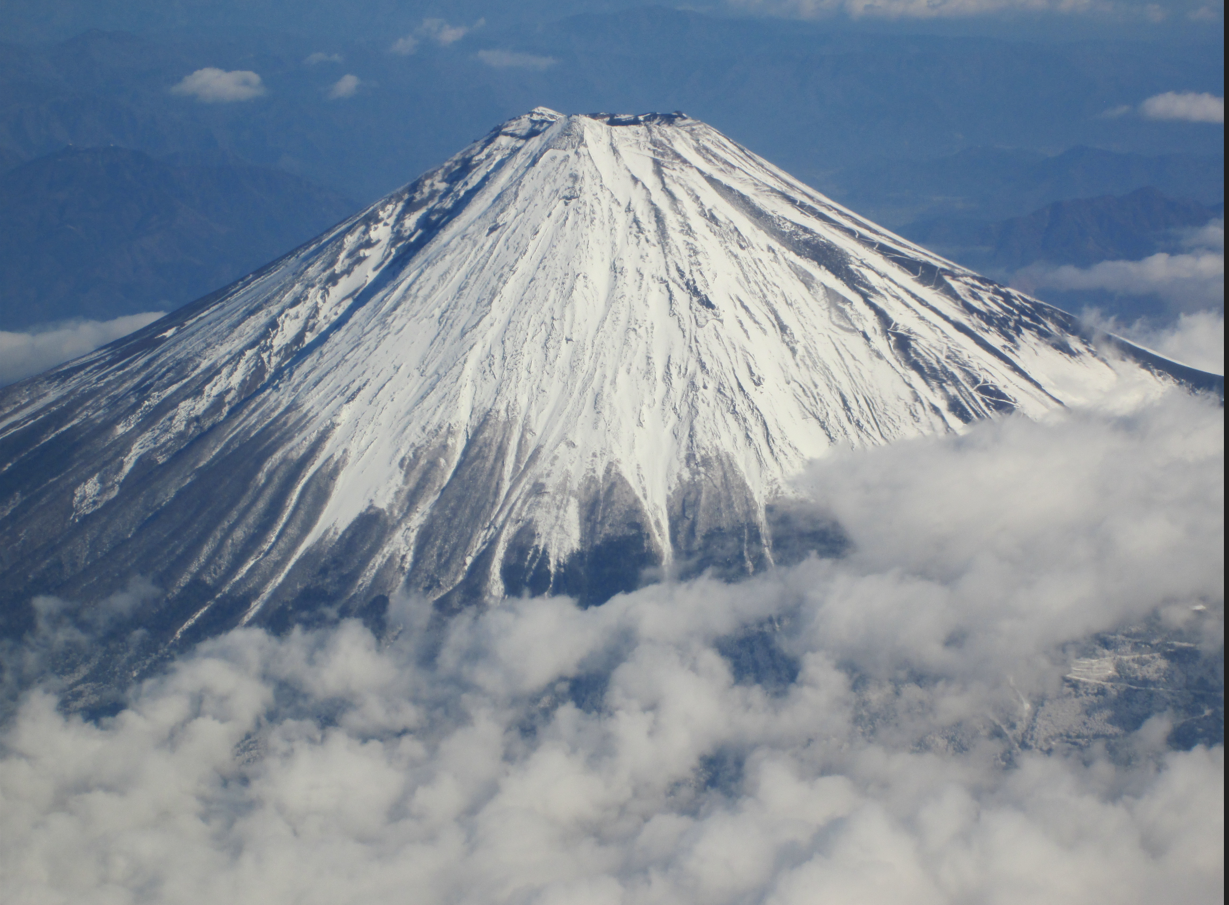

In [3]:
from IPython.display import Image
Image(filename='MtFuji.png',width=100,height=100)

Solution to Exercise 1b

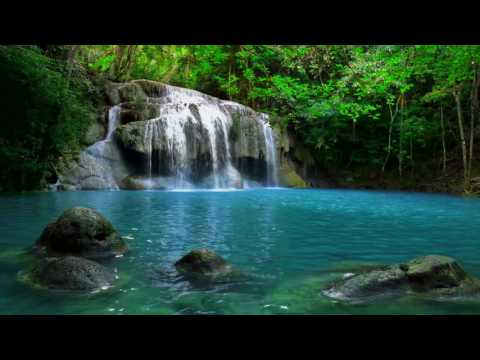

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('oYEtLQ3lEH0',width=200,height=200)

## Patterns in Societal Data 

Solution to Exercise 2

In [11]:
#STEP TWO
df2=raw_CPS_data[['address','student_count_total','student_count_black','graduation_rate_school','zip']]
df2=df2[df2["zip"]==60623]
df2=df2.dropna()
df2=df2.reset_index(drop=True) #rows are labelled 0,1,2,... 
print("Total number of CPS schools considered in 60623 is",len(df2["zip"])) #len = length
print("Largest student_count_total = ",df2["student_count_total"].max())
print("Smallest student_count_total = ",df2["student_count_total"].min())
df2.head(2)

Total number of CPS schools considered in 60623 is 9
Largest student_count_total =  559
Smallest student_count_total =  100


,address,student_count_total,student_count_black,graduation_rate_school,zip
0,2345 S CHRISTIANA AVE,559,66,68.9,60623
1,3120 S KOSTNER AVE,319,41,86.5,60623


In [12]:
#STEP THREE
df2.columns= ["address","total","black","graduate","zip"]
for i in df2.index:
    df2.loc[i,'%black']=round(100*df2.loc[i,'black']/df2.loc[i,'total'],1)
df2.head(2)

,address,total,black,graduate,zip,%black
0,2345 S CHRISTIANA AVE,559,66,68.9,60623,11.8
1,3120 S KOSTNER AVE,319,41,86.5,60623,12.9


Intercept is  [82.47649769]
Slope is  [[-0.14939133]]
R^2 for OLS is  0.429488206625943


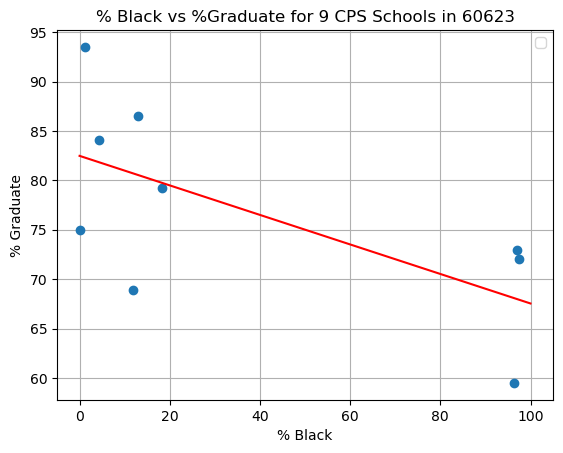

In [13]:
#STEP FOUR
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df2[["%black"]]
Y=df2[["graduate"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .01
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
# plot the school data
df2.plot(x='%black', y='graduate', style='o')  
plt.title('% Black vs %Graduate for 9 CPS Schools in 60623')  
plt.xlabel('% Black')  
plt.ylabel('% Graduate')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.savefig("CPSregression2.png")
plt.show()

This shows graduates rates tend not to be as strong in the predominantly black schools in 60623.


## Patterns in Mathematics


Solution to Exercise 3a

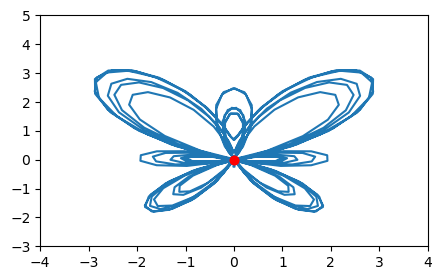

In [15]:
#Butterfly Curve
%matplotlib inline
#-----Set Up Plot -----
fig= plt.figure(figsize=(5,3))
plt.xlim(-4,4)
plt.ylim(-3,5)
##-----PARAMETRIC DEFINITION OF Butterfly CURVE------
t = np.arange(0, 12*np.pi, 0.1)
xt=np.sin(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-(np.sin(t/12))**5)      
yt=np.cos(t)*(np.exp(np.cos(t))- 2*np.cos(4*t)-(np.sin(t/12))**5) 
plt.gca().plot(xt, yt)

def init():
    redDot, = plt.gca().plot([0], [0], 'ro') #starting position of dot
    return redDot,

def animate(i):
    redDot,= plt.gca().plot([np.sin(i)*(np.exp(np.cos(i))-2*np.cos(4*i)-(np.sin(i/12))**5) ], [np.cos(i)*(np.exp(np.cos(i))- 2*np.cos(4*i)-(np.sin(i/12))**5) ],'ro',ms=2,alpha=1)
    return redDot,

# create animation using the animate() function
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,12*np.pi,.01), init_func=init, interval=5, blit=True, repeat=False)

plt.show()

Solution to Exercise 3b.

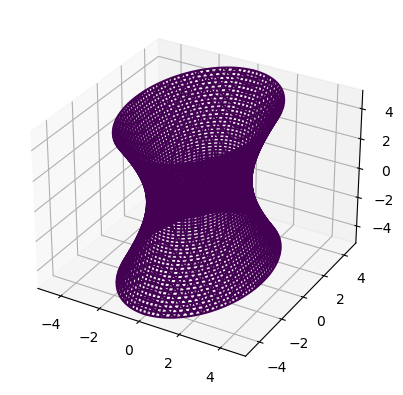

In [19]:
def hyperboloid_1sheet(x,y,z):
    return (x/2)**2+(y/3)**2-(z/4)**2-1

plot_implicit(hyperboloid_1sheet)

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,5))

#---Create grid points at which to evaluate the function z(x,y)
x = np.linspace(-4, 4, 250)
y = np.linspace(-6, 6, 250)
X, Y = np.meshgrid(x, y)
Z=4*np.sqrt((X/2)**2+(Y/3)**2-1)
#--Create the Contours--
contours=plt.contour(X, Y, Z, levels=np.linspace(0,4,5), colors='black');
#---Plot the Dividing Streamline---------
plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('hyperb1.png')

<img src="hyperb1.png" width="700" align="center">

## Connecting Patterns in Mathematics to Patterns in Nature and Society

Solution to Exercise 4.

An ineffective system is one in which the two extraction wells (one mid-plume and one midstream) are not strong enough to capture all the pollution detected by the monitoring wells.

A regular system is one where the two extractions working together are sufficient to capture all the pollution.

An inefficient system is one where the mid-plume extraction well could be turned off, and the downstream extraction well by itself is sufficiently strong to capture all the pollution.